In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv('41-50.csv')

# Split the dataset into a training set (80%) and a test set (20%)
train, test = train_test_split(data, test_size=0.2, random_state=42)

# Separate features (citations columns) 
X = data[['cit_2017', 'cit_2018', 'cit_2019', 'cit_2020', 'cit_2021']]
X_train = train[['cit_2017', 'cit_2018', 'cit_2019', 'cit_2020', 'cit_2021']]
X_test = test[['cit_2017', 'cit_2018', 'cit_2019', 'cit_2020', 'cit_2021']]

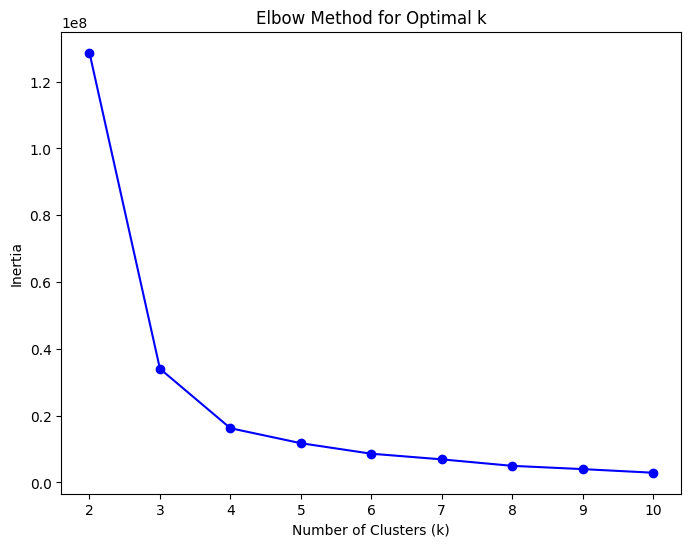

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the range of k values to consider
k_values = range(2, 11)  # You can adjust the range as needed

# Initialize an empty list to store the sum of squared distances (inertia) for each k
inertia = []

# Fit K-Means for each k and calculate inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve to find the right k
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [11]:
# Define the number of clusters
num_clusters = 4

# Initialize and fit the K-Means model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)


KMeans(n_clusters=4, random_state=42)

In [12]:

# Add cluster labels to the original dataset
data['cluster'] = kmeans.labels_

# Find the cluster assignments for the training and test data
training_cluster_labels = kmeans.predict(X_train)
test_cluster_labels = kmeans.predict(X_test)

# Find the cluster centroids
cluster_centroids = kmeans.cluster_centers_

# Initialize lists to store predictions
Pred_NN = []  #  same as the 2022 citation number of the nearest neighbor from the training set;
Pred_NC = []  #  same as the point nearest the cluster centroid;
Pred_AC = []  #  average of all others from the training set in the same cluster. 

for i, test_point in enumerate(X_test.values):
    test_cluster_label = test_cluster_labels[i]

    # Find the nearest neighbor in the same cluster
    cluster_indices = np.where(training_cluster_labels == test_cluster_label)[0]
    distances_to_neighbors = [np.linalg.norm(test_point - X_train.values[j]) for j in cluster_indices]
    nearest_neighbor_index = cluster_indices[np.argmin(distances_to_neighbors)]

    # Calculate predictions
    prediction_1 = train.iloc[nearest_neighbor_index]['cit_2022']  # 2022 citation number of the nearest neighbor
    prediction_2 = cluster_centroids[test_cluster_label][4]  # 2022 citation number of the point nearest to the cluster centroid
    prediction_3 = np.mean(train[train['cluster'] == test_cluster_label]['cit_2022'])  # Average of all others in the same cluster

    Pred_NN.append(prediction_1)
    Pred_NC.append(prediction_2)
    Pred_AC.append(prediction_3)

#Print the predicted values
results_df = pd.DataFrame()
results_df['Cit_2022'] = test['cit_2022']
results_df['Pred_NN'] = Pred_NN
results_df['Pred_NC'] = Pred_NC
results_df['Pred_AC'] = Pred_AC
print(results_df)

# Add the predictions to the test dataset
test['prediction_1'] = Pred_NN
test['prediction_2'] = Pred_NC
test['prediction_3'] = Pred_AC



KeyError: 'cluster'

In [7]:
# Calculate the average difference magnitude for each prediction type
avg_diff_magnitude_1 = np.mean(np.abs(test['cit_2022'] - test['prediction_1']))
avg_diff_magnitude_2 = np.mean(np.abs(test['cit_2022'] - test['prediction_2']))
avg_diff_magnitude_3 = np.mean(np.abs(test['cit_2022'] - test['prediction_3']))


print("Average Difference Magnitude for Nearest Neighbour method:", avg_diff_magnitude_1)
print("Average Difference Magnitude for Nearest Centroid method:", avg_diff_magnitude_2)
print("Average Difference Magnitude for Average Cluster method:", avg_diff_magnitude_3)

KeyError: 'prediction_1'